In [2]:
import pandas as pd 
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("census_17_2022.csv")
df

,Unnamed: 0,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,0,1,Oaktree Street,Stephanie,Reed,39,Head,Single,Female,Unemployed,None,None
1,1,2,Oaktree Street,Barry,Rowe,26,Head,Single,Male,"Engineer, civil (consulting)",None,None
2,2,3,Oaktree Street,Pauline,Parsons,22,Head,Single,Female,University Student,None,None
3,3,4,Oaktree Street,Ben,Payne,22,Head,Single,Male,University Student,None,None
4,4,5,Oaktree Street,Barbara,Jones,60,Head,Divorced,Female,"Surveyor, minerals",None,Christian
...,...,...,...,...,...,...,...,...,...,...,...,...
8872,8872,1,High Granary,Aaron,Norton,14,Son,NaN,Male,Student,None,NaN
8873,8873,1,High Granary,Toby,Norton,10,Son,NaN,Male,Student,None,NaN
8874,8874,1,High Granary,Ryan,Norton,5,Son,NaN,Male,Student,None,NaN
8875,8875,1,High Granary,Jane,Norton,5,Daughter,NaN,Female,Student,None,NaN


In [9]:
# Dropping the unnecessary double index column
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [10]:
df

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Oaktree Street,Stephanie,Reed,39,Head,Single,Female,Unemployed,None,None
1,2,Oaktree Street,Barry,Rowe,26,Head,Single,Male,"Engineer, civil (consulting)",None,None
2,3,Oaktree Street,Pauline,Parsons,22,Head,Single,Female,University Student,None,None
3,4,Oaktree Street,Ben,Payne,22,Head,Single,Male,University Student,None,None
4,5,Oaktree Street,Barbara,Jones,60,Head,Divorced,Female,"Surveyor, minerals",None,Christian
...,...,...,...,...,...,...,...,...,...,...,...
8872,1,High Granary,Aaron,Norton,14,Son,NaN,Male,Student,None,NaN
8873,1,High Granary,Toby,Norton,10,Son,NaN,Male,Student,None,NaN
8874,1,High Granary,Ryan,Norton,5,Son,NaN,Male,Student,None,NaN
8875,1,High Granary,Jane,Norton,5,Daughter,NaN,Female,Student,None,NaN


In [11]:
df.dtypes

House Number                     object
Street                           object
First Name                       object
Surname                          object
Age                              object
Relationship to Head of House    object
Marital Status                   object
Gender                           object
Occupation                       object
Infirmity                        object
Religion                         object
dtype: object

In [12]:
df["Relationship to Head of House"].unique()

array(['Head', 'Son', 'Daughter', 'Wife', 'Husband', 'Partner', 'None',
       'Lodger', 'Visitor', 'Grandson', 'Sibling', 'Granddaughter',
       'Cousin', 'Neice', 'Nephew', 'Adopted Son', 'Step-Son',
       'Adopted Daughter', 'Step-Daughter', 'Adopted Granddaughter'],
      dtype=object)

In [13]:
df.isna().sum()

House Number                        0
Street                              0
First Name                          0
Surname                             0
Age                                 0
Relationship to Head of House       0
Marital Status                   2209
Gender                              0
Occupation                          0
Infirmity                           0
Religion                         2260
dtype: int64

<Figure size 1000x600 with 0 Axes>

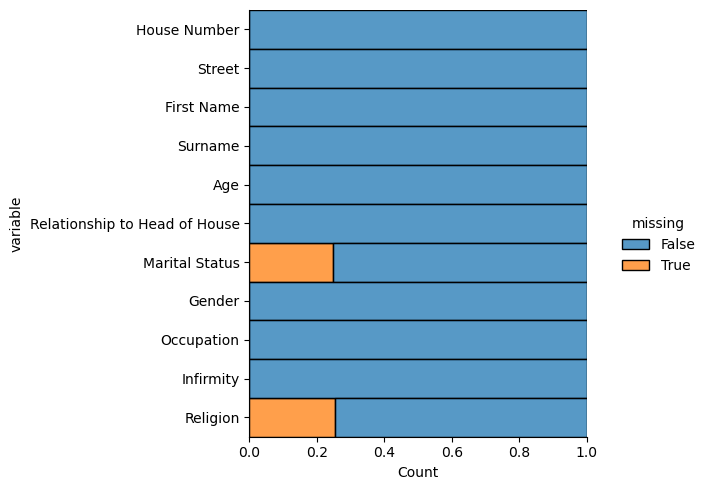

In [14]:
# Plotting a figure to show the missing values in the data set
plt.figure(figsize = (10, 6))
sns.displot(df.isna().melt(value_name = 'missing'),
            y = "variable",
            hue = 'missing',
            multiple = 'fill',
            aspect = 1.25)

In [15]:
df["Marital Status"].notnull().sum()

6668

In [507]:
# Percentage of empty entries in Marital Status
(df["Marital Status"].isnull().sum()/df["Marital Status"].notnull().sum()) * 100

33.12837432513497

In [508]:
df["Marital Status"].unique()

array(['Single', 'Divorced', nan, 'Married', 'Widowed', 'M', 'D', 'S',
       ' ', 'W'], dtype=object)

In [509]:
# Having single entries in Marital Status
df["Marital Status"].replace({"S": "Single", "D": "Divorced", "M": "Married", "W": "Widowed", " ": np.nan}, inplace = True)

In [510]:
df['Marital Status'].unique()

array(['Single', 'Divorced', nan, 'Married', 'Widowed'], dtype=object)

In [511]:
df['Marital Status'].mode()

0    Single
dtype: object

In [512]:
df['Marital Status'].notnull().sum()

6667

In [524]:
# Queer entry 
df.loc[(df['Marital Status'] == "Married") & (df['Age'] < 18)]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
6597,116,Rice Drive,Julie,Dennis,17,Head,Married,Female,Student,None,NaN


In [525]:
df.loc[(df['House Number'] == 116) & (df['Street'] == 'Rice Drive')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [526]:
df.loc[(df['Marital Status'].isnull()) & (df['Age'] < 18), "First Name"].count()

2210

In [527]:
df['Marital Status'].isnull().sum()

2210

In [528]:
"""Since all of the missing entries in the Marital Status column are all minors
   We fill them with the 'NA' entry as instructed in the assignment instructions"""

df.loc[(df["Marital Status"].isnull()) & (df["Age"] < 18), "Marital Status"] = "NA"

In [529]:
df['Marital Status'].isnull().sum()

0

#### Fixing House Number column

In [530]:
df["House Number"].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45',
       '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56',
       '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67',
       '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78',
       '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89',
       '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100',
       '101', '102', '103', '104', '105', '106', '107', '108', '109',
       '110', '111', '112', '113', '114', '115', '116', '117', '118',
       '119', '120', '121', '122', '123', '124', '125', '126', '127',
       '128', '129', '130', '131', '132', '133', '134', '135', '136',
       '137', '138', '139', '140', '141', '142', '143', '144', '1

In [531]:
# One entry has Three as an entry
df[df["House Number"] == "Three"]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
8558,Three,Calendar Lane,Aimee,Roberts,84,Head,Widowed,Female,"Retired Therapist, music",None,Methodist


In [532]:
df.loc[8558]["House Number"]

'Three'

In [533]:
# Changing the one entry to 3 string
df.loc[df["House Number"] == "Three", "House Number"] = '3'

In [534]:
df.iloc[8558]

House Number                                            3
Street                                      Calendar Lane
First Name                                          Aimee
Surname                                           Roberts
Age                                                    84
Relationship to Head of House                        Head
Marital Status                                    Widowed
Gender                                             Female
Occupation                       Retired Therapist, music
Infirmity                                            None
Religion                                        Methodist
Name: 8558, dtype: object

In [535]:
# Changing all house numbers to integers
df['House Number'] = df['House Number'].astype(int)

In [536]:
type(df["House Number"][3])

numpy.int32

In [537]:
df[df["Street"] == "Oaktree Street"]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Oaktree Street,Stephanie,Reed,39,Head,Single,Female,Unemployed,None,None
1,2,Oaktree Street,Barry,Rowe,26,Head,Single,Male,"Engineer, civil (consulting)",None,None
2,3,Oaktree Street,Pauline,Parsons,22,Head,Single,Female,University Student,None,None
3,4,Oaktree Street,Ben,Payne,22,Head,Single,Male,University Student,None,None
4,5,Oaktree Street,Barbara,Jones,60,Head,Divorced,Female,"Surveyor, minerals",None,Christian
5,5,Oaktree Street,Mark,Jones,30,Son,Single,Male,IT trainer,None,Christian
6,6,Oaktree Street,Amelia,Richardson,29,Head,Single,Female,"Surveyor, hydrographic",None,None
7,6,Oaktree Street,Josephine,Richardson,11,Daughter,NA,Female,Student,None,NaN
8,7,Oaktree Street,Eric,Marshall,49,Head,Married,Male,Learning disability nurse,None,Catholic
9,7,Oaktree Street,Lydia,Marshall,47,Wife,Married,Female,Barista,None,None


#### Analyzing Street Column

In [538]:
df["Street"].mode()

0    Sagittarius Avenue
dtype: object

In [539]:
df.groupby("Street")["Street"].count().head(50)

Street
Aberdeen Lane              66
Albans Circle             132
Autumn Springs             27
Barrett Walk              339
Bath Alley                  6
Bathhouse Avenue           68
Baxter Fall                67
Beech Farmhouse             1
Bird Villages              53
Bumblebee Barn              5
Bumblebee Commune           9
Calendar Drive            161
Calendar Lane              86
Calendarbond Road         179
Chemist Knoll             276
Cinnamon Brook             34
Cook Forge                 29
Copperbank Drive           17
Dove Street                24
Duck Avenue               106
Duncan Rapid               15
East Chalet                 2
Elephant Bastion           11
England Lane               32
Falcon Circles            181
Fisher Lane                56
Forgotten Drive           550
Fornax Drive              101
Foster Estates             47
Grace Mountains            36
Hammond Village            25
Harris Avenue              35
Henry River               151
Hew

#### First Name Analysis

In [540]:
df["First Name"].isnull().sum()

0

#### Analyzing Age column

In [514]:
df['Age'].unique()

array(['39', '26', '22', '60', '30', '29', '11', '49', '47', '68', '58',
       '18', '53', '12', '55', '17', '16', '52', '45', '69', '71', '40',
       '48', '65', '19', '66', '62', '35', '34', '46', '6', '32', '15',
       '13', '8', '44', '50', '10', '9', '43', '28', '25', '21', '14',
       '54', '56', '0', '41', '5', '4', '61', '42', '7', '2', '20', '38',
       '72', '51', '3', '37', '23', '63', '64', '57', '78', '27', '73',
       '74', '1', '33', '77', '85', '80', '24', '36', '93', '96', '70',
       '67', '31', '81', '79', '89', '59', '83', '76', '86', '82', '84',
       '88', '101', '87', '105', '94', '99', '75', '97', '104', '91',
       '49.77707321', '47.77707321', '73.74774667', '71.74774667',
       '56.24027028', '57.98671889', 'twenty three', '80.9465235',
       '87.9465235', '47.41597341', '48.41597341', '95', '103',
       '73.06402995', '90', '78.60502655', '76.60502655', '70.67699981'],
      dtype=object)

In [515]:
df[df['Age'] == 'twenty three']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
6150,18,Aberdeen Lane,Colin,Martin,twenty three,Head,Divorced,Male,Accounting technician,None,None


In [516]:
df.loc[df["Age"] == 'twenty three', "Age"] = "23"

In [517]:
df.loc[df["Age"] == '23']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
134,10,Barrett Walk,Janet,Smith,23,Partner,Single,Female,Dentist,None,None
157,19,Barrett Walk,Olivia,Newman,23,Daughter,Single,Female,Trade union research officer,None,None
280,62,Barrett Walk,Hollie,Wood,23,Head,Single,Female,Artist,None,None
335,79,Barrett Walk,Tracey,Hughes,23,Wife,Married,Female,Multimedia programmer,None,None
363,89,Barrett Walk,Gerald,Gibbs,23,Son,Divorced,Male,"Teacher, early years/pre",None,None
...,...,...,...,...,...,...,...,...,...,...,...
8432,160,Osborne Street,Joshua,Hardy,23,Son,Single,Male,Analytical chemist,None,None
8656,6,Peninsula Street,Hollie,Bennett,23,Head,Married,Female,"Scientist, research (maths)",None,None
8731,43,Kelly Lane,Nicola,Lewis,23,Daughter,Single,Female,"Engineer, manufacturing systems",None,None
8749,4,Lomond Lane,Debra,Akhtar,23,None,Single,Female,"Designer, ceramics/pottery",None,None


In [518]:
df["Age"].unique()

array(['39', '26', '22', '60', '30', '29', '11', '49', '47', '68', '58',
       '18', '53', '12', '55', '17', '16', '52', '45', '69', '71', '40',
       '48', '65', '19', '66', '62', '35', '34', '46', '6', '32', '15',
       '13', '8', '44', '50', '10', '9', '43', '28', '25', '21', '14',
       '54', '56', '0', '41', '5', '4', '61', '42', '7', '2', '20', '38',
       '72', '51', '3', '37', '23', '63', '64', '57', '78', '27', '73',
       '74', '1', '33', '77', '85', '80', '24', '36', '93', '96', '70',
       '67', '31', '81', '79', '89', '59', '83', '76', '86', '82', '84',
       '88', '101', '87', '105', '94', '99', '75', '97', '104', '91',
       '49.77707321', '47.77707321', '73.74774667', '71.74774667',
       '56.24027028', '57.98671889', '80.9465235', '87.9465235',
       '47.41597341', '48.41597341', '95', '103', '73.06402995', '90',
       '78.60502655', '76.60502655', '70.67699981'], dtype=object)

In [519]:
# Turning all values to float and flooring them to their lower numbers since they are not yet their upper age limits
df["Age"] = df["Age"].astype(float)
df["Age"] = np.floor(df["Age"])

In [520]:
df.Age.unique()

array([ 39.,  26.,  22.,  60.,  30.,  29.,  11.,  49.,  47.,  68.,  58.,
        18.,  53.,  12.,  55.,  17.,  16.,  52.,  45.,  69.,  71.,  40.,
        48.,  65.,  19.,  66.,  62.,  35.,  34.,  46.,   6.,  32.,  15.,
        13.,   8.,  44.,  50.,  10.,   9.,  43.,  28.,  25.,  21.,  14.,
        54.,  56.,   0.,  41.,   5.,   4.,  61.,  42.,   7.,   2.,  20.,
        38.,  72.,  51.,   3.,  37.,  23.,  63.,  64.,  57.,  78.,  27.,
        73.,  74.,   1.,  33.,  77.,  85.,  80.,  24.,  36.,  93.,  96.,
        70.,  67.,  31.,  81.,  79.,  89.,  59.,  83.,  76.,  86.,  82.,
        84.,  88., 101.,  87., 105.,  94.,  99.,  75.,  97., 104.,  91.,
        95., 103.,  90.])

In [521]:
# Converting the Age column to integers
df.Age = df["Age"].astype(int)

In [522]:
df.Age.unique()

array([ 39,  26,  22,  60,  30,  29,  11,  49,  47,  68,  58,  18,  53,
        12,  55,  17,  16,  52,  45,  69,  71,  40,  48,  65,  19,  66,
        62,  35,  34,  46,   6,  32,  15,  13,   8,  44,  50,  10,   9,
        43,  28,  25,  21,  14,  54,  56,   0,  41,   5,   4,  61,  42,
         7,   2,  20,  38,  72,  51,   3,  37,  23,  63,  64,  57,  78,
        27,  73,  74,   1,  33,  77,  85,  80,  24,  36,  93,  96,  70,
        67,  31,  81,  79,  89,  59,  83,  76,  86,  82,  84,  88, 101,
        87, 105,  94,  99,  75,  97, 104,  91,  95, 103,  90])

In [523]:
df.loc[df['Age'] > 100]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
555,6,Henry River,Helen,Johnson,101,Head,Divorced,Female,"Retired Merchandiser, retail",None,Methodist
1097,18,Parker Lane,Amber,Gray,105,Head,Widowed,Female,"Retired Therapist, music",None,Catholic
1991,2,Walton Road,Pamela,Lynch,104,Head,Widowed,Female,Retired Transport planner,None,None
6837,38,Forgotten Drive,Kenneth,Kaur,103,Husband,Married,Male,Retired Art gallery manager,None,None
7764,7,Albans Circle,Kimberley,Smith,104,Head,Married,Female,Retired Camera operator,None,None
7765,7,Albans Circle,Henry,Smith,103,Husband,Married,Male,Retired Theatre stage manager,Unknown Infection,None
8763,8,Lomond Lane,Nicole,Moore,103,Head,Widowed,Female,"Retired Journalist, broadcasting",None,Christian


#### Analyzing Relationship to Head column

In [541]:
df["Relationship to Head of House"].unique()

array(['Head', 'Son', 'Daughter', 'Wife', 'Husband', 'Partner', 'None',
       'Lodger', 'Visitor', 'Grandson', 'Sibling', 'Granddaughter',
       'Cousin', 'Neice', 'Nephew', 'Adopted Son', 'Step-Son',
       'Adopted Daughter', 'Step-Daughter', 'Adopted Granddaughter'],
      dtype=object)

In [542]:
df[df["Relationship to Head of House"] == "Neice"]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
548,4,Henry River,Irene,Jones,10,Neice,NA,Female,Student,None,NaN
549,4,Henry River,Lydia,Jones,6,Neice,NA,Female,Student,None,NaN
550,4,Henry River,Alexandra,Jones,6,Neice,NA,Female,Student,None,NaN
568,11,Henry River,Lindsey,Coles,9,Neice,NA,Female,Student,None,NaN
1803,4,Mace Plain,Christine,Hamilton,22,Neice,Single,Female,University Student,None,Christian
1805,4,Mace Plain,Eleanor,Scott,18,Neice,Single,Female,Student,None,None
3234,8,Baxter Fall,Sally,O'Brien,15,Neice,NA,Female,Student,None,NaN
4781,178,Sagittarius Avenue,Tracy,Barker,13,Neice,NA,Female,Student,None,NaN
4782,178,Sagittarius Avenue,Emily,Goodwin,13,Neice,NA,Female,Student,None,NaN
6542,101,Rice Drive,Hayley,Hughes,5,Neice,NA,Female,Student,None,NaN


In [543]:
# There is a misspelling of the word Niece written as Niece in the Relationship to Head of House column

In [544]:
# Correcting the spelling error
df.loc[df["Relationship to Head of House"] == "Neice", "Relationship to Head of House"] = "Niece"

In [545]:
df.loc[df["Relationship to Head of House"] == "Niece"]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
548,4,Henry River,Irene,Jones,10,Niece,NA,Female,Student,None,NaN
549,4,Henry River,Lydia,Jones,6,Niece,NA,Female,Student,None,NaN
550,4,Henry River,Alexandra,Jones,6,Niece,NA,Female,Student,None,NaN
568,11,Henry River,Lindsey,Coles,9,Niece,NA,Female,Student,None,NaN
1803,4,Mace Plain,Christine,Hamilton,22,Niece,Single,Female,University Student,None,Christian
1805,4,Mace Plain,Eleanor,Scott,18,Niece,Single,Female,Student,None,None
3234,8,Baxter Fall,Sally,O'Brien,15,Niece,NA,Female,Student,None,NaN
4781,178,Sagittarius Avenue,Tracy,Barker,13,Niece,NA,Female,Student,None,NaN
4782,178,Sagittarius Avenue,Emily,Goodwin,13,Niece,NA,Female,Student,None,NaN
6542,101,Rice Drive,Hayley,Hughes,5,Niece,NA,Female,Student,None,NaN


In [546]:
df['Relationship to Head of House'].unique()

array(['Head', 'Son', 'Daughter', 'Wife', 'Husband', 'Partner', 'None',
       'Lodger', 'Visitor', 'Grandson', 'Sibling', 'Granddaughter',
       'Cousin', 'Niece', 'Nephew', 'Adopted Son', 'Step-Son',
       'Adopted Daughter', 'Step-Daughter', 'Adopted Granddaughter'],
      dtype=object)

In [547]:
df.loc[(df['Relationship to Head of House'] == "Head") & (df['Gender'] == "Female"), "Gender" ].count()

1931

In [548]:
df.loc[(df['Relationship to Head of House'] == "Head") & (df['Gender'] == "Female") ].head(20)

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Oaktree Street,Stephanie,Reed,39,Head,Single,Female,Unemployed,None,None
2,3,Oaktree Street,Pauline,Parsons,22,Head,Single,Female,University Student,None,None
4,5,Oaktree Street,Barbara,Jones,60,Head,Divorced,Female,"Surveyor, minerals",None,Christian
6,6,Oaktree Street,Amelia,Richardson,29,Head,Single,Female,"Surveyor, hydrographic",None,None
13,11,Oaktree Street,Stacey,Metcalfe,53,Head,Single,Female,Unemployed,None,None
16,13,Oaktree Street,Georgina,Brown,55,Head,Single,Female,"Psychologist, counselling",None,Christian
21,16,Oaktree Street,Charlene,Kent-Little,69,Head,Married,Female,Retired Politician's assistant,None,None
26,18,Oaktree Street,Ruth,Allen,40,Head,Single,Female,"Psychologist, sport and exercise",None,Catholic
30,20,Oaktree Street,Carly,Bowen,65,Head,Widowed,Female,Unemployed,None,None
31,21,Oaktree Street,Fiona,Dean,30,Head,Single,Female,Insurance claims handler,None,None


In [549]:
df.loc[(df['Relationship to Head of House'] == "Head") & (df['Gender'] == "Male"), "Gender" ].count()

905

In [550]:
# Checking for Head of houses which are under 18
df.loc[(df['Relationship to Head of House'] == 'Head') & (df['Age'] < 18)]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4329,61,Sagittarius Avenue,Geraldine,O'Brien,15,Head,Widowed,Female,Unemployed,None,NaN
6597,116,Rice Drive,Julie,Dennis,17,Head,Married,Female,Student,None,NaN


In [551]:
df.loc[(df['House Number'] == 61) & (df['Street'] == 'Sagittarius Avenue')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4329,61,Sagittarius Avenue,Geraldine,O'Brien,15,Head,Widowed,Female,Unemployed,None,NaN
4330,61,Sagittarius Avenue,Jeffrey,Taylor,26,Visitor,Single,Male,Systems developer,None,Catholic


In [552]:
"""Dropping this household since the entries do not make sense.
   Head of the house is a girl aged 15 and is widowed"""

df.drop([4329, 4330], axis = 0, inplace = True)

In [553]:
df.loc[(df['Street'] == "Sagittarius Avenue") & (df['First Name'] == 'Geraldine')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4110,2,Sagittarius Avenue,Geraldine,Rowe,16,Daughter,NA,f,Student,None,NaN
4350,66,Sagittarius Avenue,Geraldine,Cameron,15,Daughter,NA,Female,Student,None,NaN
4603,131,Sagittarius Avenue,Geraldine,Matthews,17,Daughter,NA,Female,Student,None,NaN
5002,241,Sagittarius Avenue,Geraldine,Kaur,39,Head,Divorced,Female,Unemployed,None,Catholic


In [554]:
df.loc[(df['Relationship to Head of House'] == 'Head') & (df['Gender'] == 'Female') & (df['Age'] < 18)]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
6597,116,Rice Drive,Julie,Dennis,17,Head,Married,Female,Student,None,NaN


In [555]:
# Investigating Julie Dennis case by looking at her whole household
df.loc[(df['House Number'] == 116) & (df['Street'] == 'Rice Drive')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
6597,116,Rice Drive,Julie,Dennis,17,Head,Married,Female,Student,None,NaN
6598,116,Rice Drive,Mathew,Dennis,19,Husband,Married,Male,University Student,None,NaN
6599,116,Rice Drive,Declan,Dennis,0,Son,NA,Male,Child,None,NaN
6600,116,Rice Drive,Marcus,Phillips,25,Visitor,Divorced,Male,Freight forwarder,None,None


In [556]:
"""She lives with her husband who is over 18 ,
   so he should be the head of the house and is eligible to be making the entries for the house""" 

# Making the husband Head of house
df.loc[(df['House Number'] == 116) & (df['First Name'] == "Mathew"), "Relationship to Head of House"] = "Head"

# Correcting Julie Dennis from Head of house to Wife
df.loc[(df['House Number'] == 116) & (df["First Name"] == "Julie"), "Relationship to Head of House"] = "Wife"

In [557]:
df.loc[(df["House Number"] == 116) & (df["Street"] == "Rice Drive")]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
6597,116,Rice Drive,Julie,Dennis,17,Wife,Married,Female,Student,None,NaN
6598,116,Rice Drive,Mathew,Dennis,19,Head,Married,Male,University Student,None,NaN
6599,116,Rice Drive,Declan,Dennis,0,Son,NA,Male,Child,None,NaN
6600,116,Rice Drive,Marcus,Phillips,25,Visitor,Divorced,Male,Freight forwarder,None,None


#### Analyzing Gender column

In [558]:
df["Gender"].unique()

array(['Female', 'Male', 'm', 'f', 'female', 'F', 'M', 'male', ' '],
      dtype=object)

In [559]:
# Creating uniform entries in Gender column 
df["Gender"].replace({"m":"Male", "f":"Female", "F":"Female", "M":"Male", "male":"Male", "female":"Female"," ": np.nan}, inplace = True)

In [560]:
df["Gender"].unique()

array(['Female', 'Male', nan], dtype=object)

In [561]:
df["Gender"].isnull().sum()

1

In [562]:
df[df["Gender"].isnull()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2224,3,Chemist Knoll,Kim,Bailey,3,Daughter,NA,NaN,Child,None,NaN


In [563]:
# Since this is clearly a Female we impute the Gender as Female
df.loc[df["Gender"].isnull(), "Gender"] = "Female"

In [564]:
df["Gender"].isnull().sum()

0

In [565]:
df.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [566]:
# Analyzing Occupation column
df["Occupation"].value_counts()

Student                                                1785
University Student                                      607
Unemployed                                              561
Child                                                   527
Administrator, sports                                    16
                                                       ... 
Retired Contracting civil engineer                        1
Retired Adult nurse                                       1
Retired Actor                                             1
Retired Psychologist, prison and probation services       1
Retired Engineer, structural                              1
Name: Occupation, Length: 1054, dtype: int64

In [567]:
df.loc[df["Occupation"].str.contains("Retired")].head(40)

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
10,8,Oaktree Street,Jonathan,Harrison,68,Head,Widowed,Male,Retired Economist,None,None
21,16,Oaktree Street,Charlene,Kent-Little,69,Head,Married,Female,Retired Politician's assistant,None,None
22,16,Oaktree Street,Julian,Kent-Little,71,Husband,Married,Male,Retired Radio producer,None,None
116,4,Barrett Walk,Joanna,Booth,72,Head,Widowed,Female,"Retired Buyer, industrial",None,Christian
159,20,Barrett Walk,Carole,Hill,78,Head,Widowed,Female,"Retired Psychotherapist, dance movement",None,None
171,23,Barrett Walk,Victor,Pearson,71,Head,Married,Male,Retired Adult guidance worker,None,None
172,23,Barrett Walk,Patricia,Pearson,69,Wife,Married,Female,Retired Paediatric nurse,None,None
178,26,Barrett Walk,David,Turner,73,Head,Divorced,Male,Retired Museum/gallery curator,None,None
181,28,Barrett Walk,Sally,O'Connor,74,Head,Widowed,Female,Retired Acupuncturist,None,Methodist
195,32,Barrett Walk,Joseph,Jones,71,Head,Widowed,Male,Retired Diagnostic radiographer,None,None


In [568]:
df["Occupation"].nunique()

1054

In [569]:
df.loc[df["Occupation"].str.contains("Retired"), "Occupation"].count()

654

In [570]:
df["Occupation"].nunique() - df.loc[df["Occupation"].str.contains("Retired"), "Occupation"].count()

400

In [571]:
"""Replacing the labels of everyone who is retired as just retired as their occupations do not do any good to the economy anymore"""
df.loc[df["Occupation"].str.contains("Retired"), "Occupation"] = "Retired"

In [572]:
df["Occupation"].nunique()

644

In [573]:
df["Occupation"].unique()

array(['Unemployed', 'Engineer, civil (consulting)', 'University Student',
       'Surveyor, minerals', 'IT trainer', 'Surveyor, hydrographic',
       'Student', 'Learning disability nurse', 'Barista', 'Retired',
       'Development worker, community', 'Advice worker',
       'Psychologist, counselling', 'Conservator, furniture',
       'Bookseller', 'Lobbyist', 'Cabin crew',
       'Psychologist, sport and exercise',
       'Designer, blown glass/stained glass', 'Social worker',
       'Insurance claims handler', 'Education administrator',
       'Trade mark attorney', 'Retail manager', 'Furniture designer',
       'Television floor manager', 'Estate agent',
       'Designer, interior/spatial', 'Office manager', 'Engineer, energy',
       'Chemical engineer', 'Geophysicist/field seismologist',
       'Environmental education officer', 'Chemist, analytical',
       'Structural engineer', 'Materials engineer', 'Child',
       'Administrator, sports', 'Chiropodist', 'Engineer, electronic

In [574]:
# Infirmity column analysis
df["Infirmity"].unique()

array(['None', 'Physical Disability', 'Disabled', 'Deaf',
       'Mental Disability', 'Blind', ' ', 'Unknown Infection'],
      dtype=object)

In [575]:
df.Infirmity.value_counts()

None                   8805
Physical Disability      23
Disabled                 11
                         10
Deaf                      9
Mental Disability         8
Unknown Infection         5
Blind                     4
Name: Infirmity, dtype: int64

In [576]:
df.loc[df["Infirmity"] == " ", "Infirmity"].count()

10

In [577]:
# Replace the blank values as None since the majority of the people do not have any Infirmities
df.loc[df["Infirmity"] == " ", "Infirmity"] = "None"

In [578]:
df["Infirmity"].unique()

array(['None', 'Physical Disability', 'Disabled', 'Deaf',
       'Mental Disability', 'Blind', 'Unknown Infection'], dtype=object)

In [579]:
df.Infirmity.value_counts()

None                   8815
Physical Disability      23
Disabled                 11
Deaf                      9
Mental Disability         8
Unknown Infection         5
Blind                     4
Name: Infirmity, dtype: int64

In [580]:
df.Infirmity.isnull().sum()

0

#### Religion column Analysis

In [581]:
df["Religion"].unique()

array(['None', 'Christian', nan, 'Catholic', 'Methodist', 'Muslim',
       'Sikh', 'Jewish', 'Buddist', 'Undecided', 'Bahai', 'Quaker',
       'Housekeeper', 'Nope', 'Agnostic', ' ', 'Baptist', 'Hindu'],
      dtype=object)

In [582]:
# Putting people with blank entries as nan
df.loc[df["Religion"] == " ", "Religion"] = np.nan 

In [583]:
df.Religion.unique()

array(['None', 'Christian', nan, 'Catholic', 'Methodist', 'Muslim',
       'Sikh', 'Jewish', 'Buddist', 'Undecided', 'Bahai', 'Quaker',
       'Housekeeper', 'Nope', 'Agnostic', 'Baptist', 'Hindu'],
      dtype=object)

In [584]:
# Relabelling "Nope" entry as nan since it is a joke entry
df.loc[df["Religion"] == "Nope", "Religion"] = np.nan

In [585]:
df.Religion.unique()

array(['None', 'Christian', nan, 'Catholic', 'Methodist', 'Muslim',
       'Sikh', 'Jewish', 'Buddist', 'Undecided', 'Bahai', 'Quaker',
       'Housekeeper', 'Agnostic', 'Baptist', 'Hindu'], dtype=object)

In [586]:
df.isnull().sum()

House Number                        0
Street                              0
First Name                          0
Surname                             0
Age                                 0
Relationship to Head of House       0
Marital Status                      0
Gender                              0
Occupation                          0
Infirmity                           0
Religion                         2261
dtype: int64

In [587]:
df.dtypes

House Number                      int32
Street                           object
First Name                       object
Surname                          object
Age                               int32
Relationship to Head of House    object
Marital Status                   object
Gender                           object
Occupation                       object
Infirmity                        object
Religion                         object
dtype: object

In [588]:
df.loc[df["Age"] < 18, "Age"].count()

2211

In [ ]:
fig, scat = plt.subplots(figsize = (12, 8))
scat = sns.scatterplot(data = df, y = "Relationship to Head of House", x = 'Age', hue = 'Marital Status')

Text(0.5, 1.0, 'Figure of people under the age of 18')

<Figure size 720x432 with 0 Axes>

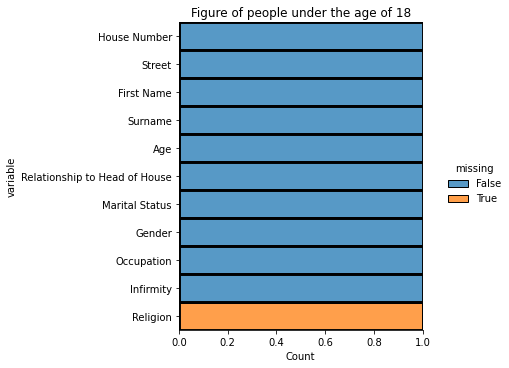

In [589]:
# Plot of people who are under the age of 18
plt.figure(figsize = (10, 6))
sns.displot(df.loc[df["Age"] < 18].isna().melt(value_name = 'missing'),
            y = "variable",
            hue = 'missing',
            multiple = 'fill',
            aspect = 1.25)
plt.title("Figure of people under the age of 18")

In [590]:
df.isnull().sum()

House Number                        0
Street                              0
First Name                          0
Surname                             0
Age                                 0
Relationship to Head of House       0
Marital Status                      0
Gender                              0
Occupation                          0
Infirmity                           0
Religion                         2261
dtype: int64

In [591]:
df.loc[df["Religion"] == "Undecided"]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1535,14,Hovebow Drive,Andrew,Hayes,42,Head,Divorced,Male,Unemployed,None,Undecided


In [592]:
df.loc[(df["Street"] == "Hovebow Drive") & (df['House Number']==14)]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1535,14,Hovebow Drive,Andrew,Hayes,42,Head,Divorced,Male,Unemployed,None,Undecided
1536,14,Hovebow Drive,Harriet,Hayes,12,Daughter,NA,Female,Student,None,NaN
1537,14,Hovebow Drive,Neil,Hayes,9,Son,NA,Male,Student,None,NaN
1538,14,Hovebow Drive,Antony,Hayes,7,Son,NA,Male,Student,None,NaN


In [593]:
df.Religion.isnull().sum()

2261

In [594]:
df.Religion.value_counts()

None           3055
Christian      1926
Catholic        915
Methodist       511
Muslim          106
Sikh             53
Jewish           33
Housekeeper       4
Quaker            3
Bahai             2
Agnostic          2
Baptist           1
Buddist           1
Undecided         1
Hindu             1
Name: Religion, dtype: int64

In [595]:
# Investigating Housekeeper religion entries
df.loc[df['Religion'] == "Housekeeper"]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4170,17,Sagittarius Avenue,June,Cooke,55,Head,Married,Female,"Lecturer, further education",None,Housekeeper
4171,17,Sagittarius Avenue,Andrew,Cooke,61,Husband,Married,Male,Theme park manager,None,Housekeeper
4172,17,Sagittarius Avenue,Ross,Cooke,20,Son,Divorced,Male,University Student,None,Housekeeper
4173,17,Sagittarius Avenue,Henry,Cooke,19,Adopted Son,Single,Male,University Student,None,Housekeeper


In [596]:
# Replacing Housekeeper entries in religion because they are inaccurate and joke entries
df.loc[df['Religion'] == 'Housekeeper', "Religion"] = "None"

In [597]:
df.Age.dtypes

dtype('int32')

In [598]:
df.loc[(df['Age'] < 18)]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
7,6,Oaktree Street,Josephine,Richardson,11,Daughter,NA,Female,Student,None,NaN
14,11,Oaktree Street,Katy,Metcalfe,12,Daughter,NA,Female,Student,None,NaN
17,13,Oaktree Street,Maria,Brown,17,Daughter,NA,Female,Student,None,NaN
18,13,Oaktree Street,Rosemary,Brown,16,Daughter,NA,Female,Student,None,NaN
25,17,Oaktree Street,Laura,Flynn,16,Daughter,NA,Female,Student,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...
8872,1,High Granary,Aaron,Norton,14,Son,NA,Male,Student,None,NaN
8873,1,High Granary,Toby,Norton,10,Son,NA,Male,Student,None,NaN
8874,1,High Granary,Ryan,Norton,5,Son,NA,Male,Student,None,NaN
8875,1,High Granary,Jane,Norton,5,Daughter,NA,Female,Student,None,NaN


In [599]:
"""I'll set people under the age of 18 as 'Undecided' in their religion because almost all of them have missing values and 'NaN' 
is not accurate because in their households their parents do practise religion making them most likely to practise the same religion
'Undecided' will be based on the fact that they are not mature enough to select their own religious path"""

df.loc[(df['Age'] < 18), "Religion"] = "Undecided"

In [600]:
df.loc[df['Age'] < 18]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
7,6,Oaktree Street,Josephine,Richardson,11,Daughter,NA,Female,Student,None,Undecided
14,11,Oaktree Street,Katy,Metcalfe,12,Daughter,NA,Female,Student,None,Undecided
17,13,Oaktree Street,Maria,Brown,17,Daughter,NA,Female,Student,None,Undecided
18,13,Oaktree Street,Rosemary,Brown,16,Daughter,NA,Female,Student,None,Undecided
25,17,Oaktree Street,Laura,Flynn,16,Daughter,NA,Female,Student,None,Undecided
...,...,...,...,...,...,...,...,...,...,...,...
8872,1,High Granary,Aaron,Norton,14,Son,NA,Male,Student,None,Undecided
8873,1,High Granary,Toby,Norton,10,Son,NA,Male,Student,None,Undecided
8874,1,High Granary,Ryan,Norton,5,Son,NA,Male,Student,None,Undecided
8875,1,High Granary,Jane,Norton,5,Daughter,NA,Female,Student,None,Undecided


In [601]:
df.isnull().sum()

House Number                      0
Street                            0
First Name                        0
Surname                           0
Age                               0
Relationship to Head of House     0
Marital Status                    0
Gender                            0
Occupation                        0
Infirmity                         0
Religion                         50
dtype: int64

In [602]:
df.loc[(df['Religion'].isnull())]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
12,10,Oaktree Street,Alexander,West,18,Head,Single,Male,Student,None,NaN
101,18,Bathhouse Avenue,Gillian,Thorpe,21,Head,Single,Female,University Student,None,NaN
332,78,Barrett Walk,Angela,Kemp,18,Head,Married,Female,Student,None,NaN
333,78,Barrett Walk,Glen,Kemp,21,Husband,Married,Male,University Student,None,NaN
366,90,Barrett Walk,Donald,Taylor,18,Head,Married,Male,Student,None,NaN
454,8,Renaissance Road,Danielle,Ward,18,Head,Married,Female,Student,None,NaN
455,8,Renaissance Road,Howard,Ward,19,Husband,Married,Male,University Student,None,NaN
748,20,Turner Camp,Tracey,Hughes,18,None,Single,Female,Student,None,NaN
1111,28,Parker Lane,Clive,Khan,18,Head,Single,Male,Student,None,NaN
1194,81,Parker Lane,Grace,Thompson,18,Head,Single,Female,Student,None,NaN


In [603]:
# Imputing all the remaining 50 missing Religion entries as None
df.loc[(df['Religion'].isnull(), "Religion")] = "None"

In [604]:
df.loc[(df['Street'] == 'Lisbon Lane') & (df['House Number'] == 2)]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
3292,2,Lisbon Lane,Eleanor,Hughes,18,Head,Married,Female,Student,None,None
3293,2,Lisbon Lane,Norman,Hughes,23,Husband,Married,Male,Stage manager,None,None


In [605]:
df.isnull().sum()

House Number                     0
Street                           0
First Name                       0
Surname                          0
Age                              0
Relationship to Head of House    0
Marital Status                   0
Gender                           0
Occupation                       0
Infirmity                        0
Religion                         0
dtype: int64

In [612]:
df.loc[df["Age"] < 0, "Age"].count()

0

In [618]:
df.loc[(df['Occupation'] == "Child") & (df["Age"] > 18)].head(60)

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: ylabel='Density'>

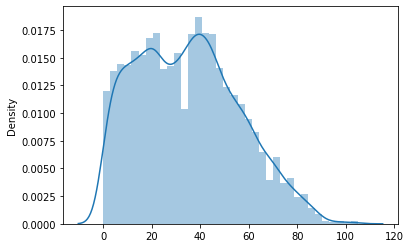

In [620]:
sns.distplot( x = df["Age"] )

In [670]:
df.loc[(df['Age'] <= 4) & (df['Gender'] == 'Male'), 'Age'].count()

262

In [671]:
df.loc[ (df['Age'] <=9) & (df['Age'] >=5) & (df['Gender'] == 'Male'), 'Age'].count()

325

In [672]:
df.loc[ (df['Age'] <=14) & (df['Age'] >=10) & (df['Gender'] == 'Male'), 'Age'].count()

313

In [673]:
df.loc[ (df['Age'] <=19) & (df['Age'] >=15) & (df['Gender'] == 'Male'), 'Age'].count()

327

In [674]:
df.loc[ (df['Age'] <=24) & (df['Age'] >=20) & (df['Gender'] == 'Male'), 'Age'].count()

348

In [675]:
df.loc[ (df['Age'] <=29) & (df['Age'] >=25) & (df['Gender'] == 'Male'), 'Age'].count()

290

In [676]:
df.loc[ (df['Age'] <=34) & (df['Age'] >=30) & (df['Gender'] == 'Male'), 'Age'].count()

289

In [677]:
df.loc[ (df['Age'] <=39) & (df['Age'] >=35) & (df['Gender'] == 'Male'), 'Age'].count()

344

In [678]:
df.loc[ (df['Age'] <=44) & (df['Age'] >=40) & (df['Gender'] == 'Male'), 'Age'].count()

344

In [679]:
df.loc[ (df['Age'] <=49) & (df['Age'] >=45) & (df['Gender'] == 'Male'), 'Age'].count()

295

In [680]:
df.loc[ (df['Age'] <=54) & (df['Age'] >=50) & (df['Gender'] == 'Male'), 'Age'].count()

257

In [681]:
df.loc[ (df['Age'] <=59) & (df['Age'] >=55) & (df['Gender'] == 'Male'), 'Age'].count()

230

In [682]:
df.loc[ (df['Age'] <=64) & (df['Age'] >=60) & (df['Gender'] == 'Male'), 'Age'].count()

198

In [683]:
df.loc[ (df['Age'] <=69) & (df['Age'] >=65) & (df['Gender'] == 'Male'), 'Age'].count()

116

In [684]:
df.loc[ (df['Age'] <=74) & (df['Age'] >=70) & (df['Gender'] == 'Female'), 'Age'].count()

118

In [685]:
df.loc[ (df['Age'] <=79) & (df['Age'] >=75) & (df['Gender'] == 'Male'), 'Age'].count()

77

In [686]:
df.loc[ (df['Age'] <=84) & (df['Age'] >=80) & (df['Gender'] == 'Male'), 'Age'].count()

46

In [687]:
df.loc[ (df['Age'] <=89) & (df['Age'] >=85) & (df['Gender'] == 'Male'), 'Age'].count()

35

In [688]:
df.loc[ (df['Age'] <=94) & (df['Age'] >=90) & (df['Gender'] == 'Male'), 'Age'].count()

6

In [689]:
df.loc[ (df['Age'] <=99) & (df['Age'] >=95) & (df['Gender'] == 'Male'), 'Age'].count()

6

In [690]:
df.loc[(df['Age'] > 100) & (df['Gender'] == 'Male'), 'Age'].count()

2

In [700]:
Female = [-265, -324, -327, -351, -364, -325, -379, -437, -422, -340, -268, -229, -178, -154, -118, -78, -59, -25, -3, -3, -5]

In [694]:
Male = [262, 325, 313, 327, 348, 290, 289, 344, 344, 295, 257, 230, 198, 116, 118, 77, 46, 35, 6, 6, 2]

In [695]:
len(Male), len(Female)

(21, 21)

In [696]:
Age_range = ['0-4','5-9','10-14','15-19','20-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','75-79','80-84','85-89','90-94','95-99','100+']

In [701]:
df_pyramid = ({'Age' : Age_range,
               'Male' : Male,
               'Female' : Female})

In [698]:
AgeClass = ['100+','95-99','90-94','85-89','80-84','75-79','70-74','65-69','60-64','55-59','50-54','45-49','40-44','35-39','30-34','25-29','20-24','15-19','10-14','5-9','0-4']

[Text(0.5, 0, 'Population'),
 Text(0, 0.5, 'Age-Group'),
 Text(0.5, 1.0, 'Population Pyramid')]

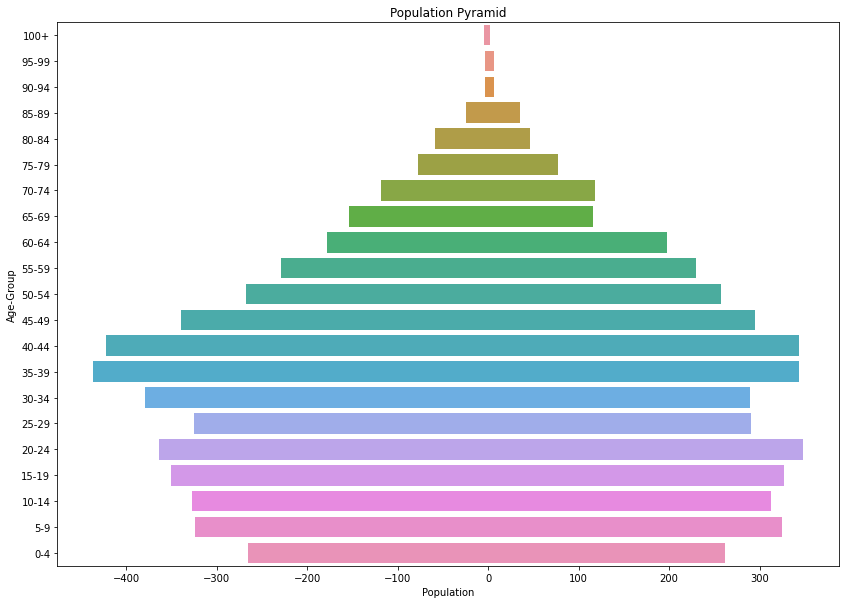

In [706]:
fig, bar_plot = plt.subplots(figsize = (14, 10))
bar_plot = sns.barplot(data = df_pyramid, x = 'Male', y = 'Age', order = AgeClass)
bar_plot = sns.barplot(data = df_pyramid, x = 'Female', y = 'Age', order = AgeClass)
bar_plot.set(xlabel = "Population", ylabel = "Age-Group", title = "Population Pyramid")

[Text(0.5, 1.0, 'Plot of Relationship against Age')]

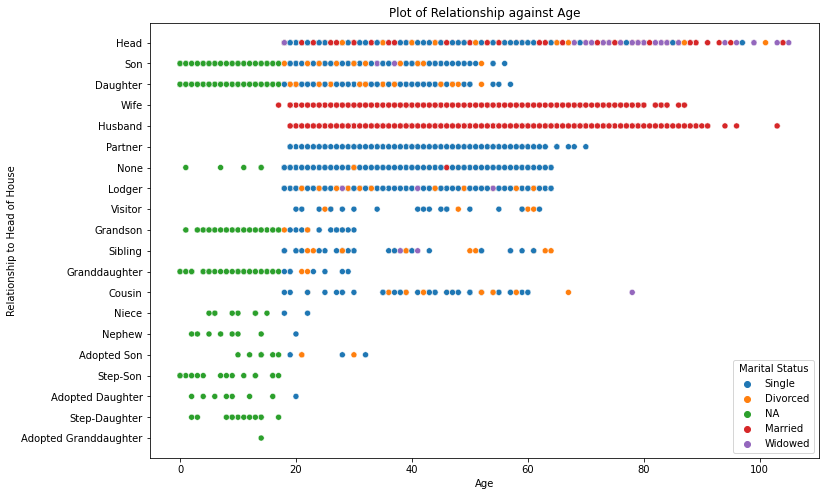

In [718]:
fig, scat = plt.subplots(figsize = (12, 8))
scat = sns.scatterplot(data = df, y = "Relationship to Head of House", x = 'Age', hue = 'Marital Status')
scat.set(title = 'Plot of Relationship against Age')

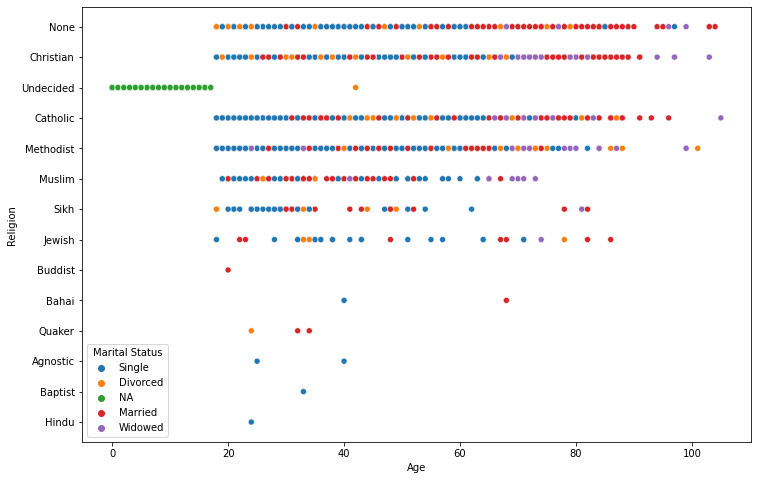

In [710]:
fig, scat = plt.subplots(figsize = (12, 8))
scat = sns.scatterplot(data = df, y = "Religion", x = 'Age', hue = 'Marital Status')

In [711]:
df.loc[(df['Relationship to Head of House'] == "None") & (df["Marital Status"] == "Married")]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
304,69,Barrett Walk,Jemma,Reeves,35,None,Married,Female,Agricultural engineer,None,None
305,69,Barrett Walk,Gareth,Reeves,42,None,Married,Male,Insurance underwriter,None,None
3016,19,Nicholls Fields,Charlene,Smith,48,None,Married,Female,Operational researcher,None,None
3017,19,Nicholls Fields,Elliot,Smith,53,None,Married,Male,Advertising art director,None,None
4807,185,Sagittarius Avenue,Gail,Harris,34,None,Married,Female,Trading standards officer,None,None
4808,185,Sagittarius Avenue,Nigel,Harris,36,None,Married,Male,Insurance underwriter,None,None
8040,9,Osborne Street,Amber,Butler,46,None,Married,Female,Contracting civil engineer,None,Methodist
8041,9,Osborne Street,Graham,Butler,51,None,Married,Male,Futures trader,None,None


In [712]:
df.loc[(df["House Number"] == 69) & (df["Street"] == 'Barrett Walk')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
302,69,Barrett Walk,Richard,May,74,Head,Married,Male,Retired,None,Christian
303,69,Barrett Walk,Katie,May,79,Wife,Married,Female,Retired,None,None
304,69,Barrett Walk,Jemma,Reeves,35,None,Married,Female,Agricultural engineer,None,None
305,69,Barrett Walk,Gareth,Reeves,42,None,Married,Male,Insurance underwriter,None,None
306,69,Barrett Walk,Angela,Reeves,14,None,NA,Female,Student,None,Undecided


In [713]:
df.loc[(df["House Number"] == 19) & (df["Street"] == 'Nicholls Fields')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
3014,19,Nicholls Fields,William,Taylor,82,Head,Married,Male,Retired,None,Sikh
3015,19,Nicholls Fields,Leanne,Taylor,78,Wife,Married,Female,Retired,None,Sikh
3016,19,Nicholls Fields,Charlene,Smith,48,None,Married,Female,Operational researcher,None,None
3017,19,Nicholls Fields,Elliot,Smith,53,None,Married,Male,Advertising art director,None,None
3018,19,Nicholls Fields,Nicholas,Smith,11,None,NA,Male,Student,None,Undecided


In [736]:
sns.histplot(x = df.groupby(["Religion"]["Religion"].count()))

<>:1: SyntaxWarning: list indices must be integers or slices, not str; perhaps you missed a comma?
<>:1: SyntaxWarning: list indices must be integers or slices, not str; perhaps you missed a comma?
<ipython-input-736-463dc22c56ab>:1: SyntaxWarning: list indices must be integers or slices, not str; perhaps you missed a comma?
  sns.histplot(x = df.groupby(["Religion"]["Religion"].count()))


TypeError: list indices must be integers or slices, not str

[Text(0.5, 0, 'Religion'), Text(0, 0.5, 'Number of People')]

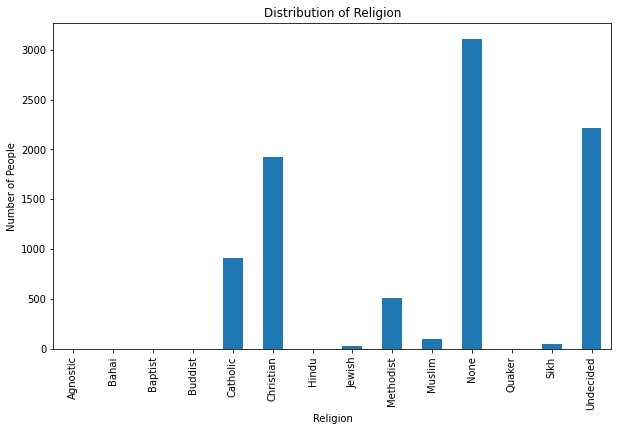

In [740]:
fig, ax = plt.subplots(figsize = (10, 6))
df.groupby(["Religion"])['Religion'].count().plot(kind = 'bar')
ax.set(title = "Distribution of Religion")
ax.set(xlabel = "Religion", ylabel = "Number of People")

In [ ]:
sns.histplot(data = df, x = "Age", y = '')